# Self-Driving Car Engineer Nanodegree


## Project02: **Advanced Lane Lines** 
***
In this project, following rubric points are addressed.

 1. Camera Calibration  
 2. Pipeline for images  
  2.1 distortion correction  
  2.2 lane extraction  
  2.3 perspective transform  
  2.4 lane identification and fitting  
  2.5 lane curvature calculation  
 3. pipeline for videos 

---

## Camera Calibration

---

## Rubric criteria

Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

## Brief description of camera calibration

When a camera looks at 3D objects and transformd them into a 2D image, image distortion occurs because that transformation is not perfect. As it is important to measure curvertures of the roads precisely for safe driving, we need to correct distortion of the camera image.
The camera matrix is a transformative matrix which represents the above relationship between the 3D object points and the 2D image points. Distortion coefficients are parameters used to mathematically calcuate the above transformation. There are two different types of distortion coefficients; radial distortion coefficients k1, k2, k3 and tangential distortion coefficients p1, p2. Radial distortion makes straight lines into curved lines, and the effects get larger as the distance from the image center increases. Tangental distortion is generated because image plane does not completely face parallel to camera lens. This distortion makes some region looks closer than it actually is in reality.

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import os
%matplotlib inline

## Detect corner points of each image
I read all 20 images in camera_cal folder and detected 9x6 chessboard corners. As calibration1.jpg did not include all corners in the image, detection results of it was not included in objpoints or imgpoints lists. Detection results were stored in output_images/1.1_detection_result/ folder.

In [10]:
# prepare object points
nx = 9
ny = 6

#initialize objectpoints and imagepoints
objpoints = []
imgpoints = []

#set object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#find all images in camera_cal foler
files = sorted(glob.glob("camera_cal/*.jpg"))

#Find corners of each image
for f in files:
    #read one image
    img = mpimg.imread(f)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners on an image
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        basename = os.path.splitext(os.path.basename(f))[0]
        out_name = 'output_images/1.1_detection_result/' + basename + '_detected.jpg'
        cv2.imwrite(out_name, img)

"""
# Plot the result
img1 = cv2.imread('output_images/1.1_detection_result/calibration3_detected.jpg')
img2 = cv2.imread('output_images/1.1_detection_result/calibration13_detected.jpg')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
fig.tight_layout()
ax1.imshow(img1)
ax1.set_title('calibration3', fontsize=50)
ax2.imshow(img2)
ax2.set_title('calibration13', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('writeup/calibration_corner_detected.jpg')
"""

"\n# Plot the result\nimg1 = cv2.imread('output_images/1.1_detection_result/calibration3_detected.jpg')\nimg2 = cv2.imread('output_images/1.1_detection_result/calibration13_detected.jpg')\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))\nfig.tight_layout()\nax1.imshow(img1)\nax1.set_title('calibration3', fontsize=50)\nax2.imshow(img2)\nax2.set_title('calibration13', fontsize=50)\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\nplt.savefig('writeup/calibration_corner_detected.jpg')\n"

## Find camera matrix and undistort image
Using detected corner points, I calculated camera matrix(mtx) and distortion coefficients(dist). Calibration results were stored in output_images/1.2_camera_calibration_result/ folder. Though two images in the camera_cal folder had different image sizes; 1281x721 for the two images and 1280x720 for the other images, I could not see the effects of the difference. Calibration7/15_undistort2.jpg were the results obtained from 1281x721 parameters.  
To clearly show the calibration result, I choose to include calibration3.jpg and calibration5.jpg in this writeup.  

In [8]:
# Do camera calibration given object points and image points
img_size = (1280, 720)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

for f in files:
    #read one image
    img = mpimg.imread(f)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    basename = os.path.splitext(os.path.basename(f))[0]
    out_name = 'output_images/1.2_camera_calibration_result/' + basename + '_undistort.jpg'
    #cv2.imwrite(out_name, dst)
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.savefig(out_name)
    """

## Pipeline for test images

---

There are six rubric criteria for this topic.  
CRITERIA1 : Provide an example of a distortion-corrected image.  
CRITERIA2 : Describe how you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.  
CRITERIA3 : Describe how you performed a perspective transform and provide an example of a transformed image.  
CRITERIA4 : Describe how you identified lane-line pixels and fit their positions with a polynomial?  
CRITERIA5 : Describe how you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.  
CRITERIA6 : Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

## Make distortion corrected images

As all images in test_images folder had the same size 1280x720. I made undistorted images of them using camera matrix and distortion coefficient calculated above. Resulting images were stored in output_images/2.1 distortion_corrected_image/.

In [13]:
#find all images in camera_cal foler
files = sorted(glob.glob("test_images/*.jpg"))
for f in files:
    img = mpimg.imread(f)
    print(f, img_size)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    basename = os.path.splitext(os.path.basename(f))[0]
    out_name = 'output_images/2.1_distortion_corrected/' + basename + '_undistorted.jpg'
    
    #plt.imshow(dst)
    plt.imsave(out_name, dst)
    
    # Plot the result
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    #fig.tight_layout()
    #ax1.imshow(img)
    #ax1.set_title(basename, fontsize=50)
    #ax2.imshow(dst)
    #ax2.set_title('binary_y', fontsize=50)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

"""
# Plot the result
img1 = mpimg.imread('test_images/straight_lines2.jpg')
img2 = mpimg.imread('output_images/2.1_distortion_corrected/straight_lines2_undistorted.jpg')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
fig.tight_layout()
ax1.imshow(img1)
ax1.set_title('straight_lines2', fontsize=50)
ax2.imshow(img2)
ax2.set_title('undistorted', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('writeup/undistort_iimage.jpg')
"""

test_images/straight_lines1.jpg (1280, 720)
test_images/straight_lines2.jpg (1280, 720)
test_images/test1.jpg (1280, 720)
test_images/test2.jpg (1280, 720)
test_images/test3.jpg (1280, 720)
test_images/test4.jpg (1280, 720)
test_images/test5.jpg (1280, 720)
test_images/test6.jpg (1280, 720)


"\n# Plot the result\nimg1 = mpimg.imread('test_images/straight_lines2.jpg')\nimg2 = mpimg.imread('output_images/2.1_distortion_corrected/straight_lines2_undistorted.jpg')\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))\nfig.tight_layout()\nax1.imshow(img1)\nax1.set_title('straight_lines2', fontsize=50)\nax2.imshow(img2)\nax2.set_title('undistorted', fontsize=50)\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\nplt.savefig('writeup/undistort_iimage.jpg')\n"

## Make thresholded binary image

I learned different kinds of filtering methods to select lane pixels. They are 1. absolute sobel threshold, 2. magnitude of sobel threshold, 3. sobel direction threshold, 4. rgb color threshold and 5. hls color threshold. I tried to apply them to the sample images.

## 1. absolute sobel threshold

This method considered derivative of images in x or y direction using sobel filter. It seemed to work for straight_lines images and test images of 2, 3 and 6, but it did not work for test images of 1, 4 and 5. Those images with unsatisfacotry results had whitish road color which made lane line less clear.

In [15]:
files2 = sorted(glob.glob("output_images/2.1_distortion_corrected/*.jpg"))

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel = cv2.Sobel(gray, cv2.CV_64F, orient=='x', orient=='y', ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's 
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sbinary
    
for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    #print(f)
    # Run the function
    binary_x = abs_sobel_thresh(img, orient='x', sobel_kernel=15, thresh_min=40, thresh_max=150)
    binary_y = abs_sobel_thresh(img, orient='y', sobel_kernel=15, thresh_min=40, thresh_max=150)
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(binary_x, cmap='gray')
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary_y, cmap='gray')
    ax2.set_title('binary_y', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/1_abssobel/' + basename + '_abssobel.jpg'
    plt.savefig(out_name)
    """

## 2. magnitude of sobel threshold

This method considered the magnitude of the above sobel derivatives.  
It did to seem to work even for straight_lines images stably.

In [17]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobel = np.sqrt(sobelx * sobelx + sobely * sobely)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return sbinary

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    # Run the function
    binary = mag_thresh(img, sobel_kernel=3, mag_thresh=(30, 100))
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('mag_soble', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/2_magsobel/' + basename + '_magsobel.jpg'
    plt.savefig(out_name)
    """

## 3. sobel direction threshold

This method considered direction of edges using sobel filter.  
As magnitude of sobel threshold, it did not seem to work properly even for simple images.

In [19]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direct = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(direct)
    sbinary[(direct >= thresh[0]) & (direct <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return sbinary

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    # Run the function
    binary = dir_threshold(img, sobel_kernel=15, thresh=(0.8, 1.2))
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('dir_thresh', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/3_dirthresh/' + basename + '_dirthresh.jpg'
    plt.savefig(out_name)
    """

## 4. rgb color threshold

This method saw color of Lanes in RGB color space.  
Though this method, especially R threshold, worked well to distinguish lanes for several images, it could not extract lanes for test1, 4, 5 images. Those image had whitish roads region where all RGB had large values. 

In [22]:
def rgb_select(img, thr_min=(0, 0, 0), thr_max=(255, 255, 255)):
    # 1) extract RGB
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(R)
    binary[(R > thr_min[0]) & (R <= thr_max[0]) & (G > thr_min[1]) & (G <= thr_max[1]) & (B > thr_min[2]) & (B <= thr_max[2])] = 1
    # 3) Return a binary image of threshold result
    binary_output = np.copy(binary) # placeholder line
    return binary_output

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    # Run the function
    binary = rgb_select(img, thr_min=(180, 150, 30), thr_max=(255, 255, 255))
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('rgb_thresh', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/4_rgbsel/' + basename + '_rgbsel.jpg'
    plt.savefig(out_name)
    """

## 5. HLS color space

This method considered HLS color, especially Saturation of the images.  This filter worked well even for difficult images with whitish roads. This meant whitish region of the roads did not have high saturation.

In [25]:
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    binary_output = np.copy(binary) # placeholder line
    return binary_output

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    # Run the function
    binary = hls_select(img, thresh=(150, 255))
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('hls_thresh', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/5_hlssel/' + basename + '_hlssel.jpg'
    plt.savefig(out_name)
    """

## 6. Combine 

Considering the above examination, 1. absolute sobel and 5. HLS color were effective to extract Lane pixels. Then I combined these two method with 'or' relationship. Resulting images were stored in output_images/2.2_binary.

In [27]:
def combine(img):
    #Run the function
    sx_binary = abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=30, thresh_max=150)
    hls_binary = hls_select(img, thresh=(150, 255))

    binary = np.zeros_like(sx_binary)
    binary[(sx_binary ==1) | (hls_binary==1)] = 1
    return binary

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]
    binary = combine(img)
    
    """
    # Plot the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    fig.tight_layout()
    ax1.imshow(img)
    ax1.set_title(basename, fontsize=50)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('dir_thresh', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    out_name = 'output_images/2.2_binary/' + basename + '_combo.jpg'
    plt.savefig(out_name)
    """

## Pipeline (test images)

---

## Perspective transform

As I assumed that the road was flat and the camera perspective had not changed, I selected straight_lines1.jpg for perspective transform. On that image, I picked up four points in a trapezoidal shape lying along the lane line. Then I selected four points in a rectangle shape as a destination, considering that the image size was 1280x720. The result of the perspective transformation was stored in output_images/2.3_perspective/ folder.

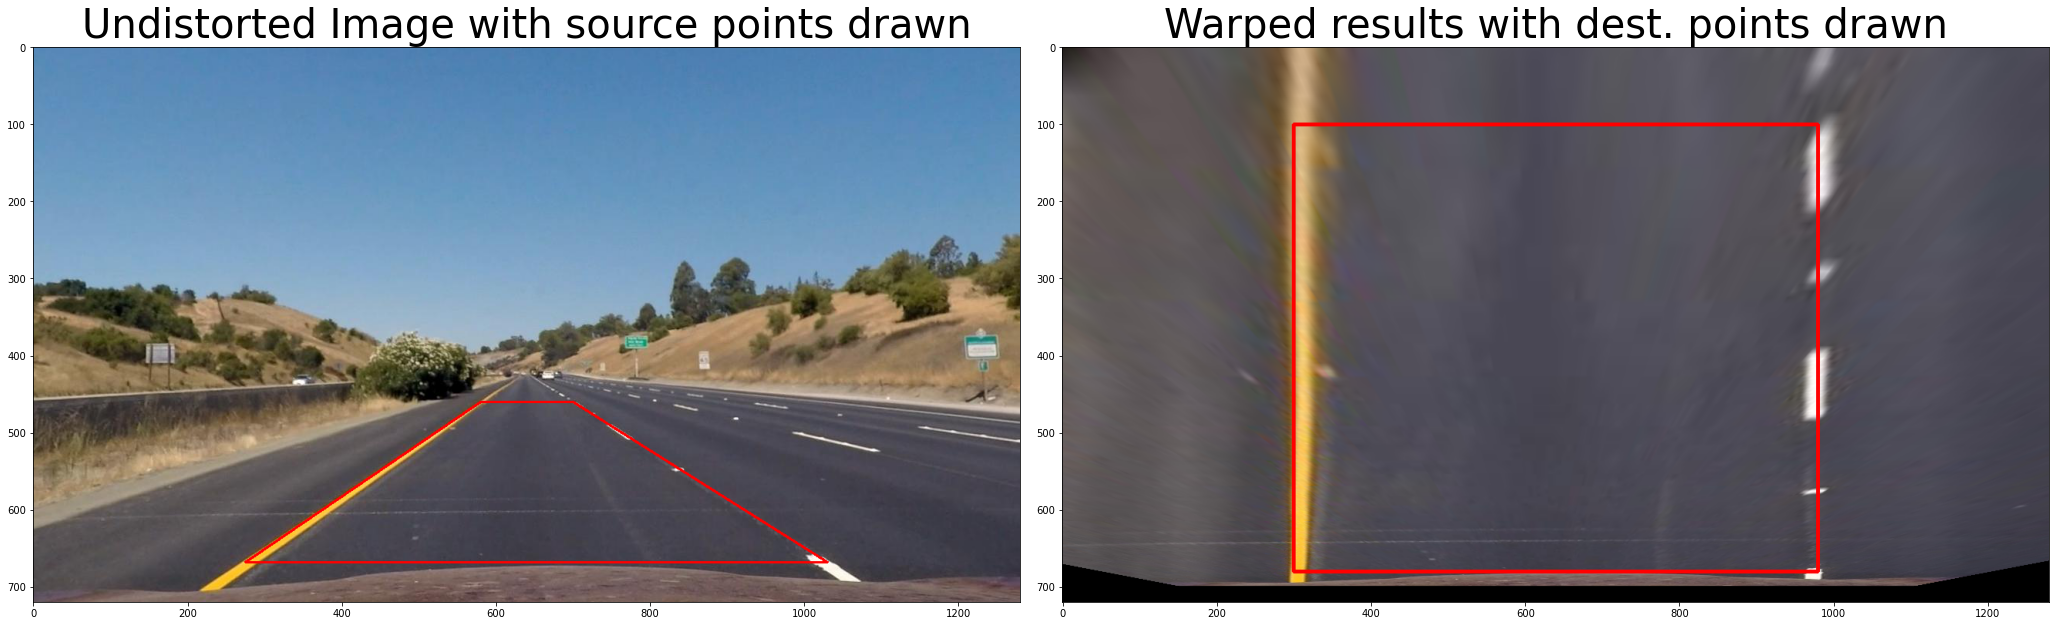

In [28]:
img = mpimg.imread('output_images/2.1_distortion_corrected/straight_lines1_undistorted.jpg')
img_size = (1280, 720)
    
src = np.array(((580,460),(700,460),(1030, 668),(275, 668)))
dst = np.array(((300,100),(980,100),(980,680),(300,680)))

# calc transform matrix
M = cv2.getPerspectiveTransform(np.float32(src), np.float32(dst))
# calc inverse transform matrix
Minv = cv2.getPerspectiveTransform(np.float32(dst), np.float32(src))
# warp an image to a top-down view
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

#draw polygon on the images
cv2.polylines(img, [src], True, (255, 0, 0), thickness=2)
cv2.polylines(warped, [dst], True, (255, 0, 0), thickness=3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Undistorted Image with source points drawn', fontsize=40)
ax2.imshow(warped)
ax2.set_title('Warped results with dest. points drawn', fontsize=40)
plt.subplots_adjust(left=0, right=1., top=1., bottom=0.)

out_name = 'output_images/2.3_perspective/straight_lines1_warped.jpg'
plt.savefig(out_name)


## Identify lane-line pixel and fit them with a polynomial
Finding lane-line pixels and fit them were performed by following codes learned in lesson 8.4. As there were more difficult images included in the sample, lane pixel extraction was unstable. Then, there were cases that no pixels were found in a small window. To avoid those emply windows cause errors, I added error checking codes in line62 and line64 which hindered empty window's empty lists to be added.
The results of this lane finding and fitting were stored in output_images/2.4_lane_fit/ folder.

In [59]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        # Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        #Identify the nonzero pixels in x and y within the window
        good_left_inds = []
        good_right_inds = []
        for i in range(len(nonzero[0])):
            if((nonzeroy[i] >= win_y_low) & (nonzeroy[i] < win_y_high)):
                if((nonzerox[i] >= win_xleft_low) & (nonzerox[i] < win_xleft_high)):
                     good_left_inds.append(i)
                if((nonzerox[i] >= win_xright_low) & (nonzerox[i] < win_xright_high)):
                     good_right_inds.append(i)

        # Append these indices to the lists
        if(len(good_left_inds) > 0):
            left_lane_inds.append(good_left_inds)
        if(len(good_right_inds) > 0):
            right_lane_inds.append(good_right_inds)
        
        #If you found > minpix pixels, recenter next window
        if(len(good_left_inds) > minpix):
            leftx_current = int(np.mean(nonzerox[good_left_inds])) 
        if(len(good_right_inds) > minpix):
            rightx_current = int(np.mean(nonzerox[good_right_inds])) 

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]

    #preprocess image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = combine(warped)

    #find lane pixel
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    
    # Fit a second order polynomial to each using np.polyfit
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
        
    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))
    f.tight_layout()
    ax1.imshow(warped)
    ax1.set_title(basename, fontsize=40)
    ax2.imshow(out_img)
    ax2.set_title('founded lane', fontsize=40)
    ax2.plot(left_fitx, ploty, color='yellow', linewidth=4)
    ax2.plot(right_fitx, ploty, color='yellow', linewidth=4)

    plt.subplots_adjust(left=0, right=1., top=1., bottom=0.)

    out_name = 'output_images/2.4_lane_fit/' + basename + '_fitted.jpg'
    plt.savefig(out_name)  
    """

## Radius of curvature



In [44]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/680 # meters per pixel in x dimension

def calc_curvature(leftx, lefty, rightx, righty, y_eval):
    # Fit a second order polynomial to each using np.polyfit
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Implement the calculation of R_curve (radius of curvature)
    left_curv = (1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**(3/2)/np.abs(2*left_fit_cr[0])
    right_curv = (1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**(3/2)/np.abs(2*right_fit_cr[0])
    ave_curv = (left_curv + right_curv)/2.0
    
    return left_curv, right_curv, ave_curv
    

for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]

    #preprocess image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = combine(warped)

    #find lane pixel
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    
    # Define y-value where we want radius of curvature
    y_eval = img.shape[0] - 1
    
    left_curv, right_curv, ave_curv = calc_curvature(leftx, lefty, rightx, righty, y_eval)
    print(basename, left_curv, 'm', right_curv, 'm', ave_curv, 'm')


straight_lines1_undistorted 1576.509611666432 m 35038.144980055724 m 18307.32729586108 m
straight_lines2_undistorted 4382.631420538895 m 8368.979899674805 m 6375.80566010685 m
test1_undistorted 619.9364112077869 m 470.9098826600107 m 545.4231469338988 m
test2_undistorted 472.7144269293826 m 374.5119755869509 m 423.6132012581668 m
test3_undistorted 1949.7611262649539 m 606.746681542127 m 1278.2539039035405 m
test4_undistorted 861.4210232121819 m 292.53840798126765 m 576.9797155967248 m
test5_undistorted 317.8638703459712 m 197.02596719227876 m 257.44491876912497 m
test6_undistorted 820.28983706654 m 509.0472882097589 m 664.6685626381495 m


## Draw lane area



In [58]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        # Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        #cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        #(win_xleft_high,win_y_high),(0,255,0), 2) 
        #cv2.rectangle(out_img,(win_xright_low,win_y_low),
        #(win_xright_high,win_y_high),(0,255,0), 2) 
        
        #Identify the nonzero pixels in x and y within the window
        good_left_inds = []
        good_right_inds = []
        for i in range(len(nonzero[0])):
            if((nonzeroy[i] >= win_y_low) & (nonzeroy[i] < win_y_high)):
                if((nonzerox[i] >= win_xleft_low) & (nonzerox[i] < win_xleft_high)):
                     good_left_inds.append(i)
                if((nonzerox[i] >= win_xright_low) & (nonzerox[i] < win_xright_high)):
                     good_right_inds.append(i)

        # Append these indices to the lists
        if(len(good_left_inds) > 0):
            left_lane_inds.append(good_left_inds)
        if(len(good_right_inds) > 0):
            right_lane_inds.append(good_right_inds)
        
        #If you found > minpix pixels, recenter next window
        if(len(good_left_inds) > minpix):
            leftx_current = int(np.mean(nonzerox[good_left_inds])) 
        if(len(good_right_inds) > minpix):
            rightx_current = int(np.mean(nonzerox[good_right_inds])) 

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


for f in files2:
    img = mpimg.imread(f)
    basename = os.path.splitext(os.path.basename(f))[0]

    #preprocess image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = combine(warped)

    #find lane pixel
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    
    # Fit a second order polynomial to each using np.polyfit
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Calclate curvature
    #y_eval = np.max(ploty)
    #y_eval = img.shape[0] - 1
    #left_curverad = (1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**(3/2)/np.abs(2*left_fit[0])
    #right_curverad = (1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**(3/2)/np.abs(2*right_fit[0])
    #ave_curvature = (left_curverad + right_curverad)/2.0
    
    y_eval = img.shape[0] - 1
    left_curv, right_curv, ave_curv = calc_curvature(leftx, lefty, rightx, righty, y_eval)
    capt1 = 'Radius of Curvature = {}(m)'.format(np.int32(ave_curv))
    
    #Calculate vehicle position
    left_pos = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_pos = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    center = (right_pos + left_pos)/2.0
    img_center = img.shape[1]/2.0
    #print(left_pos, right_pos, center, img_center)
    if(center < img_center):
        vehicle_position = (img_center - center)*xm_per_pix
        capt2 = 'Vehicle is {:.2f}m right of center'.format(vehicle_position)
    else:
        vehicle_position = (center - img_center)*xm_per_pix
        capt2 = 'Vehicle is {:.2f}m left of center'.format(vehicle_position)
        
    
    
    ## Visualization ##
    # Colors in the left and right lane regions
    #out_img[lefty, leftx] = [255, 0, 0]
    #out_img[righty, rightx] = [0, 0, 255]
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        
    for y in range(img.shape[0]):
        ce_left_x = left_fit[0]*y**2 + left_fit[1]*y + left_fit[2]
        ce_right_x = right_fit[0]*y**2 + right_fit[1]*y + right_fit[2]
        road_width = int(ce_right_x) - int(ce_left_x)
        roady = [y]*road_width
        roadx = [x for x in range(int(ce_left_x), int(ce_right_x))]   
        out_img[roady, roadx] = [127, 128, 0]

    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    #preprocess image
    reversed = cv2.warpPerspective(out_img, Minv, img_size, flags=cv2.INTER_LINEAR)
    mask = np.sum(reversed, axis=2) / 255
    mask3 = np.dstack(( mask, mask, mask))
    #added_image = (img*0.5 + reversed*0.5)*mask + img*(1-mask)
    added_image = (reversed*mask3 + img*(1-mask3)).astype(np.uint8)
    #added_image = reversed*mask
    
    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))
    f.tight_layout()
    #ax1.imshow(warped)
    ax1.imshow(reversed)
    ax1.set_title(basename, fontsize=40)
    #ax2.imshow(out_img)
    ax2.imshow(added_image.astype(np.uint8))
    #ax2.imshow(mask.astype(np.uint8), cmap='gray')
    ax2.set_title('founded lane', fontsize=40)
    #ax2.text(1.0, 1.0, 'Radius of Curvatyre = ',ha='right', va='top', transform=ax2.transAxes, fontsize=60)
    ax2.text(0.9, 1.0, capt1,ha='right', va='top', transform=ax2.transAxes, fontsize=50)
    ax2.text(0.9, 0.9, capt2,ha='right', va='top', transform=ax2.transAxes, fontsize=50)
    #ax2.text(1.0, 1.0, 'test',transform=ax2.transAxes, fontsize=40)
    #ax2.plot(left_fitx, ploty, color='yellow', linewidth=4)
    #ax2.plot(right_fitx, ploty, color='yellow', linewidth=4)

    plt.subplots_adjust(left=0, right=1., top=1., bottom=0.)
    """

    out_name = 'output_images/2.6_draw_on_image/' + basename + '_draw.jpg'
    cv2.putText(added_image, capt1, (50, 50), cv2.cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(added_image, capt2, (50, 100), cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 2, cv2.LINE_AA)
    #plt.imshow(added_image)
    plt.imsave(out_name, added_image)
    #CV_FONT_HERSHEY_PLAIN、CV_FONT_HERSHEY_SCRIPT_SIMPLEX 


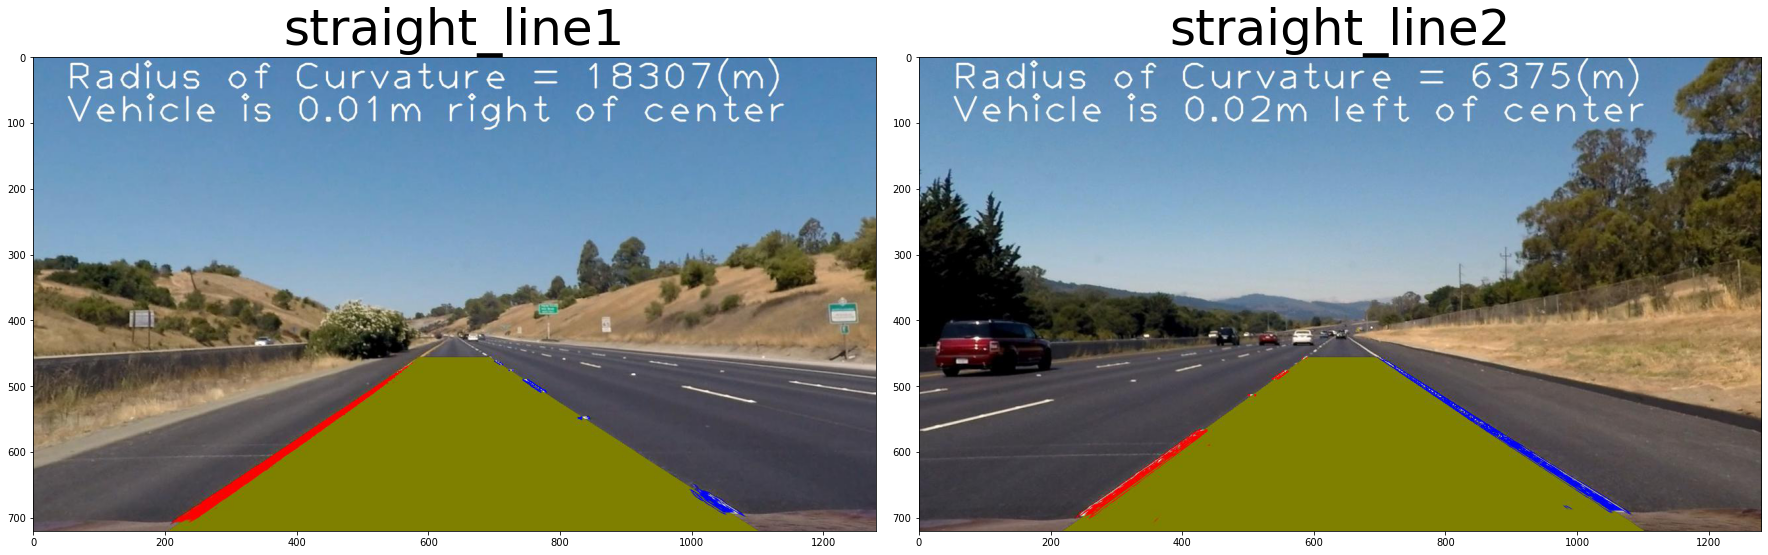

In [48]:

# Plot the result
img1 = mpimg.imread('output_images/2.6_draw_on_image/straight_lines1_undistorted_draw.jpg')
img2 = mpimg.imread('output_images/2.6_draw_on_image/straight_lines2_undistorted_draw.jpg')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
fig.tight_layout()
ax1.imshow(img1)
ax1.set_title('straight_line1', fontsize=50)
ax2.imshow(img2)
ax2.set_title('straight_line2', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('writeup/straight_line_draw.jpg')


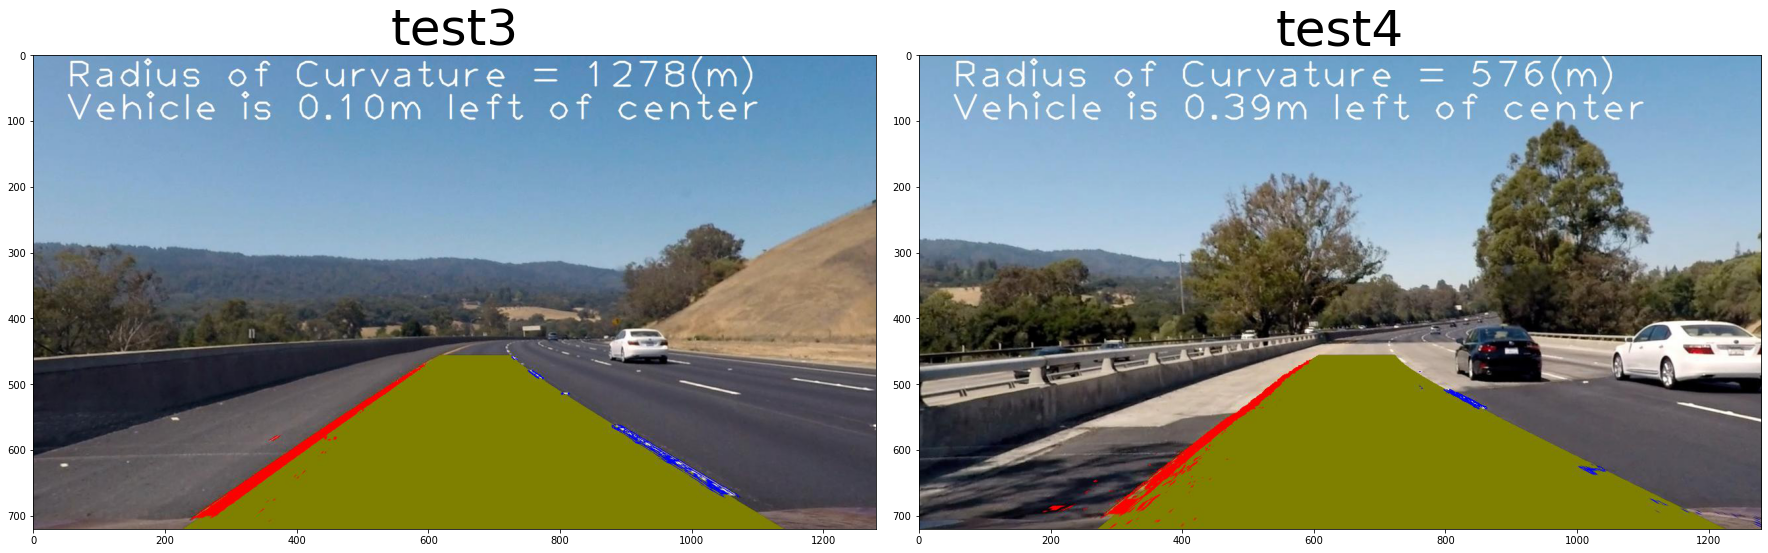

In [49]:

# Plot the result
img1 = mpimg.imread('output_images/2.6_draw_on_image/test3_undistorted_draw.jpg')
img2 = mpimg.imread('output_images/2.6_draw_on_image/test4_undistorted_draw.jpg')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
fig.tight_layout()
ax1.imshow(img1)
ax1.set_title('test3', fontsize=50)
ax2.imshow(img2)
ax2.set_title('test4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('writeup/test34_draw.jpg')


## Pipeline(video)

---

In [50]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [60]:
def process_image(img):
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = combine(warped)

    #find lane pixel
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    
    # Fit a second order polynomial to each using np.polyfit
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
            
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        
    for y in range(img.shape[0]):
        ce_left_x = left_fit[0]*y**2 + left_fit[1]*y + left_fit[2]
        ce_right_x = right_fit[0]*y**2 + right_fit[1]*y + right_fit[2]
        ce_left_x = max(0, ce_left_x)
        ce_left_x = min(img.shape[1], ce_left_x)
        ce_right_x = max(0, ce_right_x)
        ce_right_x = min(img.shape[1], ce_right_x)
        road_width = int(ce_right_x) - int(ce_left_x)
        roady = [y]*road_width
        roadx = [x for x in range(int(ce_left_x), int(ce_right_x))]   
        out_img[roady, roadx] = [127, 128, 0]

    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    
    # Calclate curvature
    #y_eval = np.max(ploty)
    #left_curverad = (1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**(3/2)/np.abs(2*left_fit[0])
    #right_curverad = (1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**(3/2)/np.abs(2*right_fit[0])
    #ave_curvature = (left_curverad + right_curverad)/2.0
    #capt1 = 'Radius of Curvature = {}(m)'.format(np.int32(ave_curvature))    
    
    y_eval = img.shape[0] - 1
    left_curv, right_curv, ave_curv = calc_curvature(leftx, lefty, rightx, righty, y_eval)
    capt1 = 'Radius of Curvature = {}(m)'.format(np.int32(ave_curv))
    
    #Calculate vehicle position
    left_pos = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_pos = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    center = (right_pos + left_pos)/2.0
    img_center = img.shape[1]/2.0
    if(center < img_center):
        vehicle_position = (img_center - center)*xm_per_pix
        capt2 = 'Vehicle is {:.2f}m right of center'.format(vehicle_position)
    else:
        vehicle_position = (center - img_center)*xm_per_pix
        capt2 = 'Vehicle is {:.2f}m left of center'.format(vehicle_position)

    #preprocess image
    reversed = cv2.warpPerspective(out_img, Minv, img_size, flags=cv2.INTER_LINEAR)
    mask = np.sum(reversed, axis=2) / 255
    mask3 = np.dstack(( mask, mask, mask))
    added_image = (reversed*mask3 + img*(1-mask3)).astype(np.uint8)
    
    #out_name = 'output_images/2.6_draw_on_image/' + basename + '_draw.jpg'
    cv2.putText(added_image, capt1, (50, 50), cv2.cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(added_image, capt2, (50, 100), cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 2, cv2.LINE_AA)
    #plt.imshow(added_image)
    #plt.imsave(out_name, added_image)
    
    return added_image


In [8]:
def process_image_old(image):
    gray = grayscale(image)

    #apply Gaussian smoothing
    blur_gray = gaussian_blur(gray, kernel_size)

    #apply Canny
    edges = canny(blur_gray, low_threshold, high_threshold)

    #make masked_image
    imshape = image.shape
    #verticesL = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
    verticesL = np.array([[(0,imshape[0]),(imshape[1]/2-10, 320), (imshape[1]/2, 320), (imshape[1]/2,imshape[0])]], dtype=np.int32)
    verticesR = np.array([[(imshape[1]/2,imshape[0]),(imshape[1]/2, 320), (imshape[1]/2+10, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edgesL = region_of_interest(edges, verticesL)
    masked_edgesR = region_of_interest(edges, verticesR)
    
    # Run Hough on edge detected image
    line_imageL = hough_lines(masked_edgesL, rho, theta, threshold, min_line_length, max_line_gap)
    line_imageR = hough_lines(masked_edgesR, rho, theta, threshold, min_line_length, max_line_gap)

    # Create a "color" binary image to combine with line image
    result = weighted_img(line_imageL, image)
    result = weighted_img(line_imageR, result)
    #result = weighted_img(line_image, image)
    return result

Let's try the one with the solid white lane on the right first ...

In [62]:
#white_output = 'output_images/project_video_out_short.mp4'
#white_output = 'output_images/challenge_video_out.mp4'
white_output = 'output_images/harder_challenge_video_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("project_video.mp4").subclip(0,1)
#clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")
clip1 = VideoFileClip("harder_challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 0/1199 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_images/harder_challenge_video_out.mp4.
Moviepy - Writing video output_images/harder_challenge_video_out.mp4



Moviepy - Done !
Moviepy - video ready output_images/harder_challenge_video_out.mp4
CPU times: user 23min 13s, sys: 23.5 s, total: 23min 37s
Wall time: 22min 22s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [57]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Now for the one with the solid yellow lane on the left. This one's more tricky!